In [ ]:
import tensorflow as tf

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train[0].shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
import numpy as np
import math

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.imshow(x_train[0])
plt.show()

In [ ]:
print(set(y_train))

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
y_train_encoded.shape

In [ ]:
x_train_reshaped = np.reshape(x_train,(60000, 784))
x_test_reshaped = np.reshape(x_test,(10000, 784))

In [77]:
# data normalization
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
ep = math.e ** -10

In [78]:
x_train_norm = (x_train_reshaped - x_mean) / (x_std + ep)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + ep)

In [95]:
# model training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [80]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [81]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
model.fit(x_train_norm, y_train_encoded, epochs=5)

Epoch 1/5
   9/1875 [..............................] - ETA: 12s - loss: 0.1694 - accuracy: 0.9479

2024-01-06 09:49:35.675864: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.1139 - accuracy: 0.9665
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0957 - accuracy: 0.9720
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0827 - accuracy: 0.9759
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0720 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0631 - accuracy: 0.9817


In [84]:
loss , accuracy = model.evaluate(x_test_norm, y_test_encoded)

2024-01-06 09:51:28.938756: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 6ms/step - loss: 0.0851 - accuracy: 0.9723


In [86]:
print("loss = ", loss * 100)

loss =  8.510947972536087


In [87]:
print("accuracy ", accuracy * 100)

accuracy  97.22999930381775


In [123]:
def classifiy_number(sample):
    sample = sample.reshape(1, 784)
    result = model.predict(sample)
    return np.argmax(result)

In [155]:
i = 8
real = y_train[i]
predicted = classifiy_number(x_train_norm[i])

print("Real value = ", real)
print("Predicted value = ", predicted)

1/1 [==============================] - 0s 36ms/step
Real value =  1
Predicted value =  1


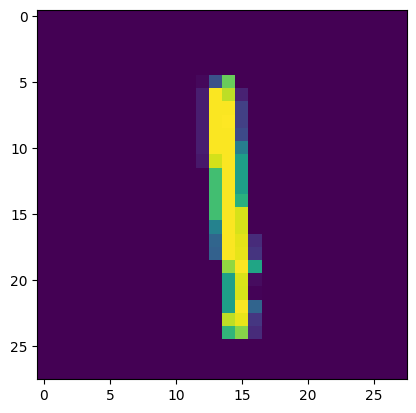

In [158]:
plt.imshow(x_train[i])
plt.show()

In [162]:
import pickle
pickle.dump(model, open("number_classifier.pkl", "wb"))

In [165]:
# x_train
pickle.dump(x_train, open("x_train.pkl",'wb'))
# x_train_norm
pickle.dump(x_train_norm, open("x_train_norm.pkl",'wb'))
# y_train
pickle.dump(y_train, open("y_train.pkl",'wb'))